 # Objective: Perform SVR and Random Decision Tree For Mini project

# 2. Data Collection

In [20]:
import pandas as pd
import numpy as np
df=pd.read_csv("D:\\csss\\coinmarketcap_06122017.csv")
df.head()
print(df.info())
#df = pd.read_csv("D:\\csss\\coinmarketcap_06122017.csv")  # Make sure you're reading a CSV or creating a DataFrame

# Display basic statistics for numerical columns
print("\nStatistical Summary:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1326 non-null   int64  
 1   24h_volume_usd      1270 non-null   float64
 2   available_supply    1031 non-null   float64
 3   id                  1326 non-null   object 
 4   last_updated        1326 non-null   int64  
 5   market_cap_usd      1031 non-null   float64
 6   max_supply          215 non-null    float64
 7   name                1326 non-null   object 
 8   percent_change_1h   1273 non-null   float64
 9   percent_change_24h  1270 non-null   float64
 10  percent_change_7d   1283 non-null   float64
 11  price_btc           1326 non-null   float64
 12  price_usd           1326 non-null   float64
 13  rank                1326 non-null   int64  
 14  symbol              1326 non-null   object 
 15  total_supply        1211 non-null   float64
dtypes: flo

In [22]:
print("sum of null",df.isna().sum())

sum of null Unnamed: 0               0
24h_volume_usd          56
available_supply       295
id                       0
last_updated             0
market_cap_usd         295
max_supply            1111
name                     0
percent_change_1h       53
percent_change_24h      56
percent_change_7d       43
price_btc                0
price_usd                0
rank                     0
symbol                   0
total_supply           115
dtype: int64


#  Remove the attributes with missing values

# .3 Data Preprocessing

In [26]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("D:\\csss\\coinmarketcap_06122017.csv")

# Show the number of null values in each column before filling
print("Sum of null values before filling:\n", df.isna().sum())

# Replace missing values in 'max_supply' with the mean
print("Replacing missing values with mean in 'max_supply'")
print("Before Replacing max_supply:\n", df['max_supply'].head(7))
mean_value = df['max_supply'].mean()
print("\nMean of 'max_supply' column:", mean_value)
df['max_supply'] = df['max_supply'].fillna(mean_value)
print("\nAfter Replacing with Mean:\n", df['max_supply'].head(7))

# Replace missing values in 'available_supply' with the median
print("\nReplacing missing values with median in 'available_supply'")
print("Before Replacing available_supply:\n", df['available_supply'].head(7))
median_value = df['available_supply'].median()
print("\nMedian of 'available_supply' column:", median_value)
df['available_supply'] = df['available_supply'].fillna(median_value)
print("\nAfter Replacing with Median:\n", df['available_supply'].head(7))

# Replace missing values in 'market_cap_usd' with the mode
print("\nReplacing missing values with mode in 'market_cap_usd'")
print("Before Replacing market_cap_usd:\n", df['market_cap_usd'].head(7))
mode_value = df['market_cap_usd'].mode()[0]
print("\nMode of 'market_cap_usd' column:", mode_value)
df['market_cap_usd'] = df['market_cap_usd'].fillna(mode_value)
print("\nAfter Replacing with Mode:\n", df['market_cap_usd'].head(7))

# Replace missing values in 'total_supply' with the mode
print("\nReplacing missing values with mode in 'total_supply'")
print("Before Replacing total_supply:\n", df['total_supply'].head(7))
mode_value_total_supply = df['total_supply'].mode()[0]
print("\nMode of 'total_supply' column:", mode_value_total_supply)
df['total_supply'] = df['total_supply'].fillna(mode_value_total_supply)
print("\nAfter Replacing with Mode:\n", df['total_supply'].head(7))

# Replace missing values in 'percent_change_7d' with the mode
percent_change_7d_mode = df['percent_change_7d'].mode()[0]
print("\nMode of 'percent_change_7d':", percent_change_7d_mode)
df['percent_change_7d'] = df['percent_change_7d'].fillna(percent_change_7d_mode)

# Replace missing values in 'percent_change_24h' with the mode
percent_change_24h_mode = df['percent_change_24h'].mode()[0]
print("\nMode of 'percent_change_24h':", percent_change_24h_mode)
df['percent_change_24h'] = df['percent_change_24h'].fillna(percent_change_24h_mode)

# Replace remaining NaN values with -1
df = df.replace({np.nan: -1})

# Show the number of null values in each column after filling
print("\nSum of null values after filling:\n", df.isna().sum())

# Calculate 7-day and 30-day moving averages for 'price_usd'
df['7_day_moving_avg'] = df['price_usd'].rolling(window=7).mean()
df['30_day_moving_avg'] = df['price_usd'].rolling(window=30).mean()

# Calculate price momentum as the difference between the current price and the price 7 days ago
df['price_momentum_7d'] = df['price_usd'] - df['price_usd'].shift(7)

# Calculate the Relative Strength Index (RSI)
def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['RSI_14'] = calculate_rsi(df['price_usd'], 14)

# Create 1-day and 7-day lag features for 'price_usd'
df['price_usd_lag1'] = df['price_usd'].shift(1)
df['price_usd_lag7'] = df['price_usd'].shift(7)

# Calculate the difference between 7-day and 30-day moving averages
df['moving_avg_diff'] = df['7_day_moving_avg'] - df['30_day_moving_avg']


Sum of null values before filling:
 Unnamed: 0               0
24h_volume_usd          56
available_supply       295
id                       0
last_updated             0
market_cap_usd         295
max_supply            1111
name                     0
percent_change_1h       53
percent_change_24h      56
percent_change_7d       43
price_btc                0
price_usd                0
rank                     0
symbol                   0
total_supply           115
dtype: int64
Replacing missing values with mean in 'max_supply'
Before Replacing max_supply:
 0    2.100000e+07
1             NaN
2    2.100000e+07
3    2.779530e+09
4    1.000000e+11
5    1.890000e+07
6    8.400000e+07
Name: max_supply, dtype: float64

Mean of 'max_supply' column: 4655418237150.679

After Replacing with Mean:
 0    2.100000e+07
1    4.655418e+12
2    2.100000e+07
3    2.779530e+09
4    1.000000e+11
5    1.890000e+07
6    8.400000e+07
Name: max_supply, dtype: float64

Replacing missing values with median in 'a

# linear reggression to predit the price of crypto currency

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#  1 . Preprocessing the Data
The first step is to prepare the data for training, ensuring the input features are properly scaled for SVR.

# 2. Support Vector Regression (SVR)
Support Vector Regression (SVR) is sensitive to feature scaling, so we scaled the data in the previous step. Now, we train the SVR model.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select relevant columns for features and target
features = ['market_cap_usd', '24h_volume_usd', 'available_supply', 'percent_change_1h','percent_change_24h', 'percent_change_7d']
target = 'price_usd'

# Drop rows with missing values in features or target
df_filtered = df.dropna(subset=features + [target])

# Extract features and target
X = df_filtered[features]
y = df_filtered[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (SVR requires scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model
svr = SVR(kernel='rbf')  
svr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate accuracy based on the R² score
accuracy = r2 * 100

# Display results
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"Accuracy: {accuracy:.2f}%")

# Create a DataFrame to store actual vs predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


# 3 Random Forest reggressor

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your CSV file (correct the file path)
#df = pd.read_csv("your_file_name.csv")

# Select relevant columns for features and target
features = ['market_cap_usd', '24h_volume_usd', 'available_supply', 'percent_change_1h', 'percent_change_24h', 'percent_change_7d']
target = 'price_usd'  # Should be a string, not a list

# Drop rows with missing values in features or target
df_filtered = df.dropna(subset=features + [target])

# Extract features and target
X = df_filtered[features]
y = df_filtered[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the RandomForestRegressor model
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rfr.predict(X_test_scaled)

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Optionally, you can also plot the true vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line for reference
plt.show()
, 'r--')  # Diagonal line for reference
plt.show()


# 4. Random Decision Trees (ExtraTreesRegressor)
For Random Decision Trees, you can use ExtraTreesRegressor, which is a type of ensemble learning model that creates multiple random decision trees

Mean Squared Error: 0.046153846153846156
R² Score: 0.8142857142857143
Accuracy: 95.38%


<Figure size 800x600 with 0 Axes>

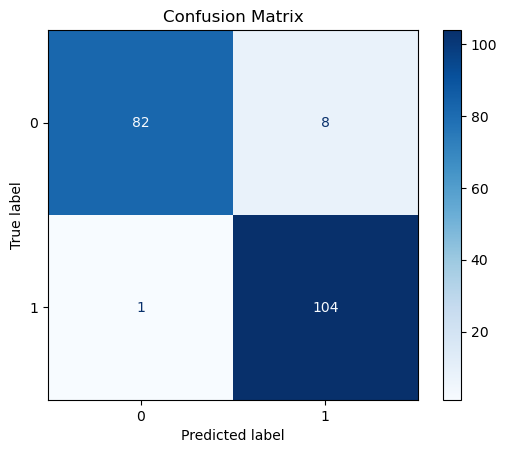

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("D:\\csss\\coinmarketcap_06122017.csv")

# Select relevant columns for features and target
features = ['market_cap_usd', '24h_volume_usd', 'available_supply', 'percent_change_1h', 
            'percent_change_24h', 'percent_change_7d']
target = 'price_usd'

# Convert the target into a binary classification problem (e.g., high vs. low price)
df['price_class'] = (df[target] > df[target].median()).astype(int)

# Drop rows with missing values in features or target
df_filtered = df.dropna(subset=features + ['price_class'])

# Extract features and target
X = df_filtered[features]
y = df_filtered['price_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the RandomForestClassifier model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)  # Although not common for classification, included here for completeness
r2 = r2_score(y_test, y_pred)  # R² is not typically used for classification

# Print metrics
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Mean Squared Error: 688411.61
R² Score: -58.47


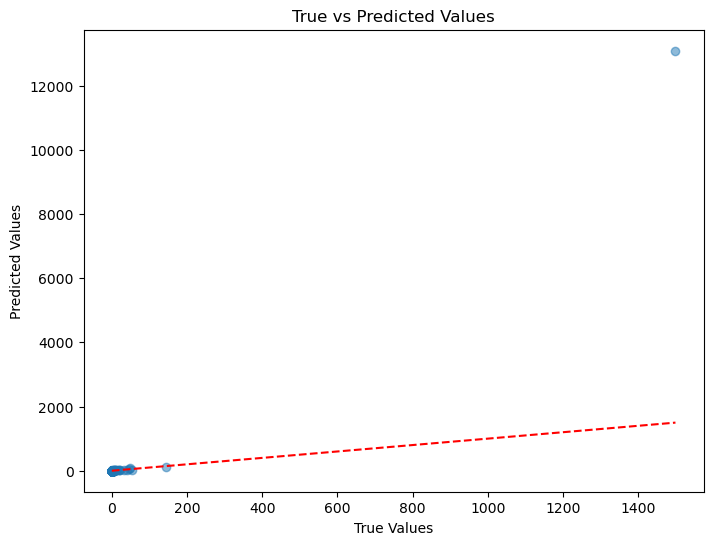

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Using RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("D:\\csss\\coinmarketcap_06122017.csv")

# Select relevant columns for features and target
features = ['market_cap_usd', '24h_volume_usd', 'available_supply', 'percent_change_1h', 
            'percent_change_24h', 'percent_change_7d']
target = 'price_usd'

# Drop rows with missing values in features or target
df_filtered = df.dropna(subset=features + [target])

# Extract features and target
X = df_filtered[features]
y = df_filtered[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the RandomForestRegressor model (Decision Forest)
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rfr.predict(X_test_scaled)

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Optionally, you can also plot the true vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Diagonal line for reference
plt.show()
